In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

In [2]:
style.use('ggplot')

In [3]:
# start = dt.datetime(2000,1,1)
# end = dt.datetime(2015,12,31)

In [4]:
# df = web.DataReader('TSLA','yahoo',start,end)
# df.to_csv('tsla.csv')

In [6]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [8]:
df[['Open', 'High']].head()

,Open,High
Date,,
2010-06-29,3.800,5.000
2010-06-30,5.158,6.084
2010-07-01,5.000,5.184
2010-07-02,4.600,4.620
2010-07-06,4.000,4.000


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

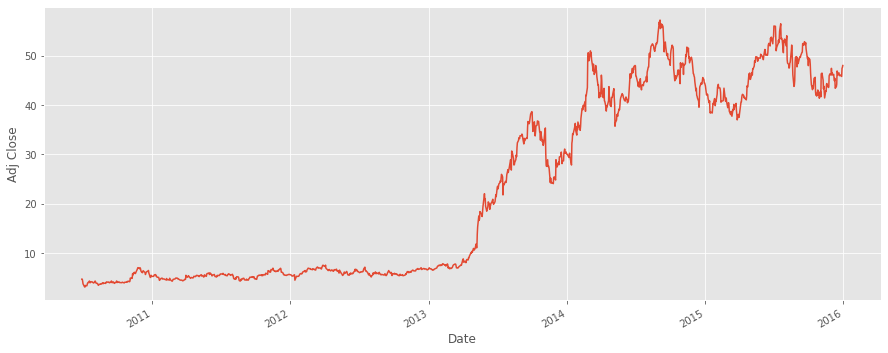

In [20]:
df['Adj Close'].plot(ylabel='Adj Close', figsize=(15,6))